In [1]:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns

In [2]:
data_train = pd.read_csv('train.csv')
data_train

,row_id,date,country,store,product,num_sold
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911
...,...,...,...,...,...,...
26293,26293,2018-12-31,Sweden,KaggleMart,Kaggle Hat,823
26294,26294,2018-12-31,Sweden,KaggleMart,Kaggle Sticker,250
26295,26295,2018-12-31,Sweden,KaggleRama,Kaggle Mug,1004
26296,26296,2018-12-31,Sweden,KaggleRama,Kaggle Hat,1441


In [3]:
data_test = pd.read_csv('test.csv')
data_test

,row_id,date,country,store,product
0,26298,2019-01-01,Finland,KaggleMart,Kaggle Mug
1,26299,2019-01-01,Finland,KaggleMart,Kaggle Hat
2,26300,2019-01-01,Finland,KaggleMart,Kaggle Sticker
3,26301,2019-01-01,Finland,KaggleRama,Kaggle Mug
4,26302,2019-01-01,Finland,KaggleRama,Kaggle Hat
...,...,...,...,...,...
6565,32863,2019-12-31,Sweden,KaggleMart,Kaggle Hat
6566,32864,2019-12-31,Sweden,KaggleMart,Kaggle Sticker
6567,32865,2019-12-31,Sweden,KaggleRama,Kaggle Mug
6568,32866,2019-12-31,Sweden,KaggleRama,Kaggle Hat


## Descriptive Analysis (Data Train)

In [4]:
data_train.describe()

,row_id,num_sold
count,26298.000000,26298.000000
mean,13148.500000,387.533577
std,7591.723026,266.076193
min,0.000000,70.000000
25%,6574.250000,190.000000
50%,13148.500000,315.000000
75%,19722.750000,510.000000
max,26297.000000,2884.000000


to see how data types of train data

In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26298 entries, 0 to 26297
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   row_id    26298 non-null  int64 
 1   date      26298 non-null  object
 2   country   26298 non-null  object
 3   store     26298 non-null  object
 4   product   26298 non-null  object
 5   num_sold  26298 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.2+ MB


to see if each column has a null value, this is the code below to see it

In [6]:
print(data_train.isnull().values.any())

False


from above, there are no row has null value

## Visualize data using Boxplot

Boxplot is using for see outliers from dataset for each variable. 

<AxesSubplot:>

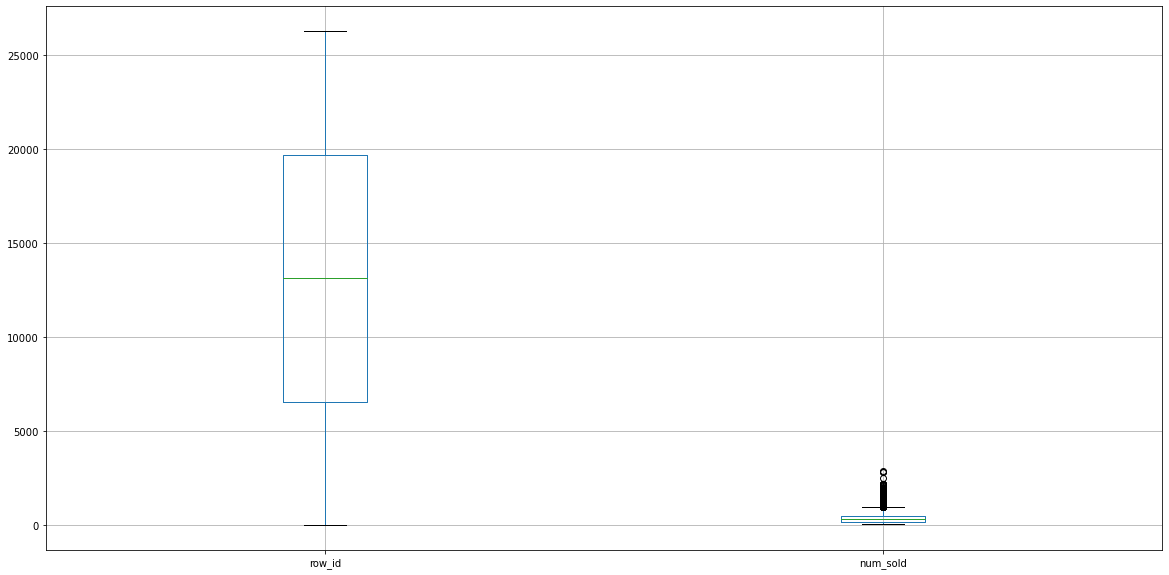

In [7]:
data_train.boxplot(figsize=(20,10))

## Unique value from each columns and plot bar 

#### 1. Country

In [8]:
country = data_train['country'].unique()
print('Unique value of country column: ',country)

Unique value of country column:  ['Finland' 'Norway' 'Sweden']


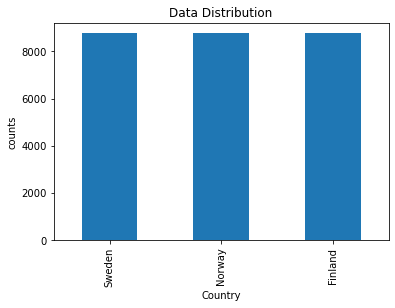

In [9]:
# figure(figsize=(8, 6), dpi=80)
data_train.value_counts(data_train['country']).plot.bar()
plt.title('Data Distribution')
plt.xlabel('Country')
plt.ylabel('counts')
# plt.legend()
plt.show()

#### 2. Store

In [10]:
store = data_train['store'].unique()
print('Unique value of store column: ', store)

Unique value of store column:  ['KaggleMart' 'KaggleRama']


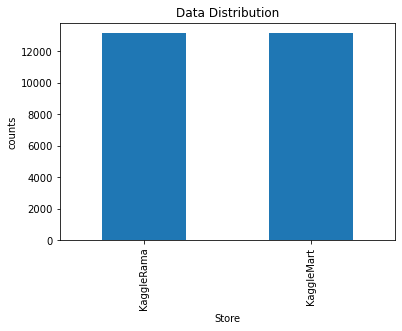

In [11]:
# figure(figsize=(8, 6), dpi=80)
data_train.value_counts(data_train['store']).plot.bar()
plt.title('Data Distribution')
plt.xlabel('Store')
plt.ylabel('counts')
# plt.legend()
plt.show()


#### 3. Product

In [12]:
product = data_train['product'].unique()
print('Unique value of product column: ', product)

Unique value of product column:  ['Kaggle Mug' 'Kaggle Hat' 'Kaggle Sticker']


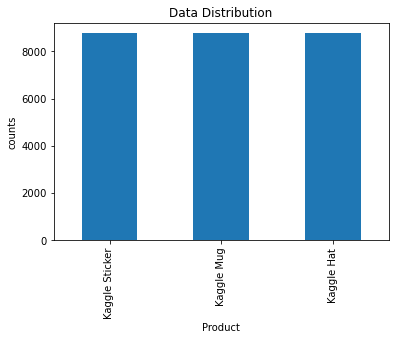

In [13]:
data_train.value_counts(data_train['product']).plot.bar()
plt.title('Data Distribution')
plt.xlabel('Product')
plt.ylabel('counts')
# plt.legend()
plt.show()

## Exploratory Data Analysis (EDA)

In [14]:
duplicate = data_train[data_train.duplicated()]
print('Number of duplicated rows from dataset: ', duplicate.shape)

Number of duplicated rows from dataset:  (0, 6)


We can see from above, there's no duplicate rows in dataset. (value is 0 as row and value is 6 as columns).
Let us to see null values from each column.

In [15]:
print(data_train.isnull().sum())

row_id      0
date        0
country     0
store       0
product     0
num_sold    0
dtype: int64


# 1. Country

### Number of sold per country 

country
Finland    2680927
Norway     4404706
Sweden     3105725
Name: num_sold, dtype: int64


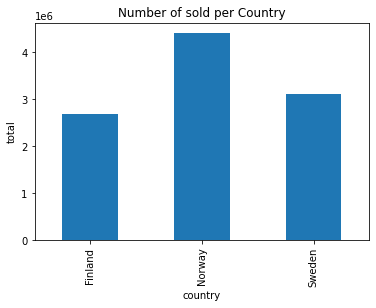

In [16]:
print(data_train.groupby('country').num_sold.sum())
data_train.groupby('country').num_sold.sum().plot(kind='bar')
plt.title('Number of sold per Country')
plt.xlabel('country')
plt.ylabel('total')
# plt.legend()
plt.show()

### Number of Sold per Country for each year 

country  date      
1        2015-12-31     608844
         2016-12-31     634668
         2017-12-31     688887
         2018-12-31     748528
2        2015-12-31    1051680
         2016-12-31    1014509
         2017-12-31    1113022
         2018-12-31    1225495
3        2015-12-31     733467
         2016-12-31     754175
         2017-12-31     799888
         2018-12-31     818195
Name: num_sold, dtype: int64


<AxesSubplot:xlabel='country,date'>

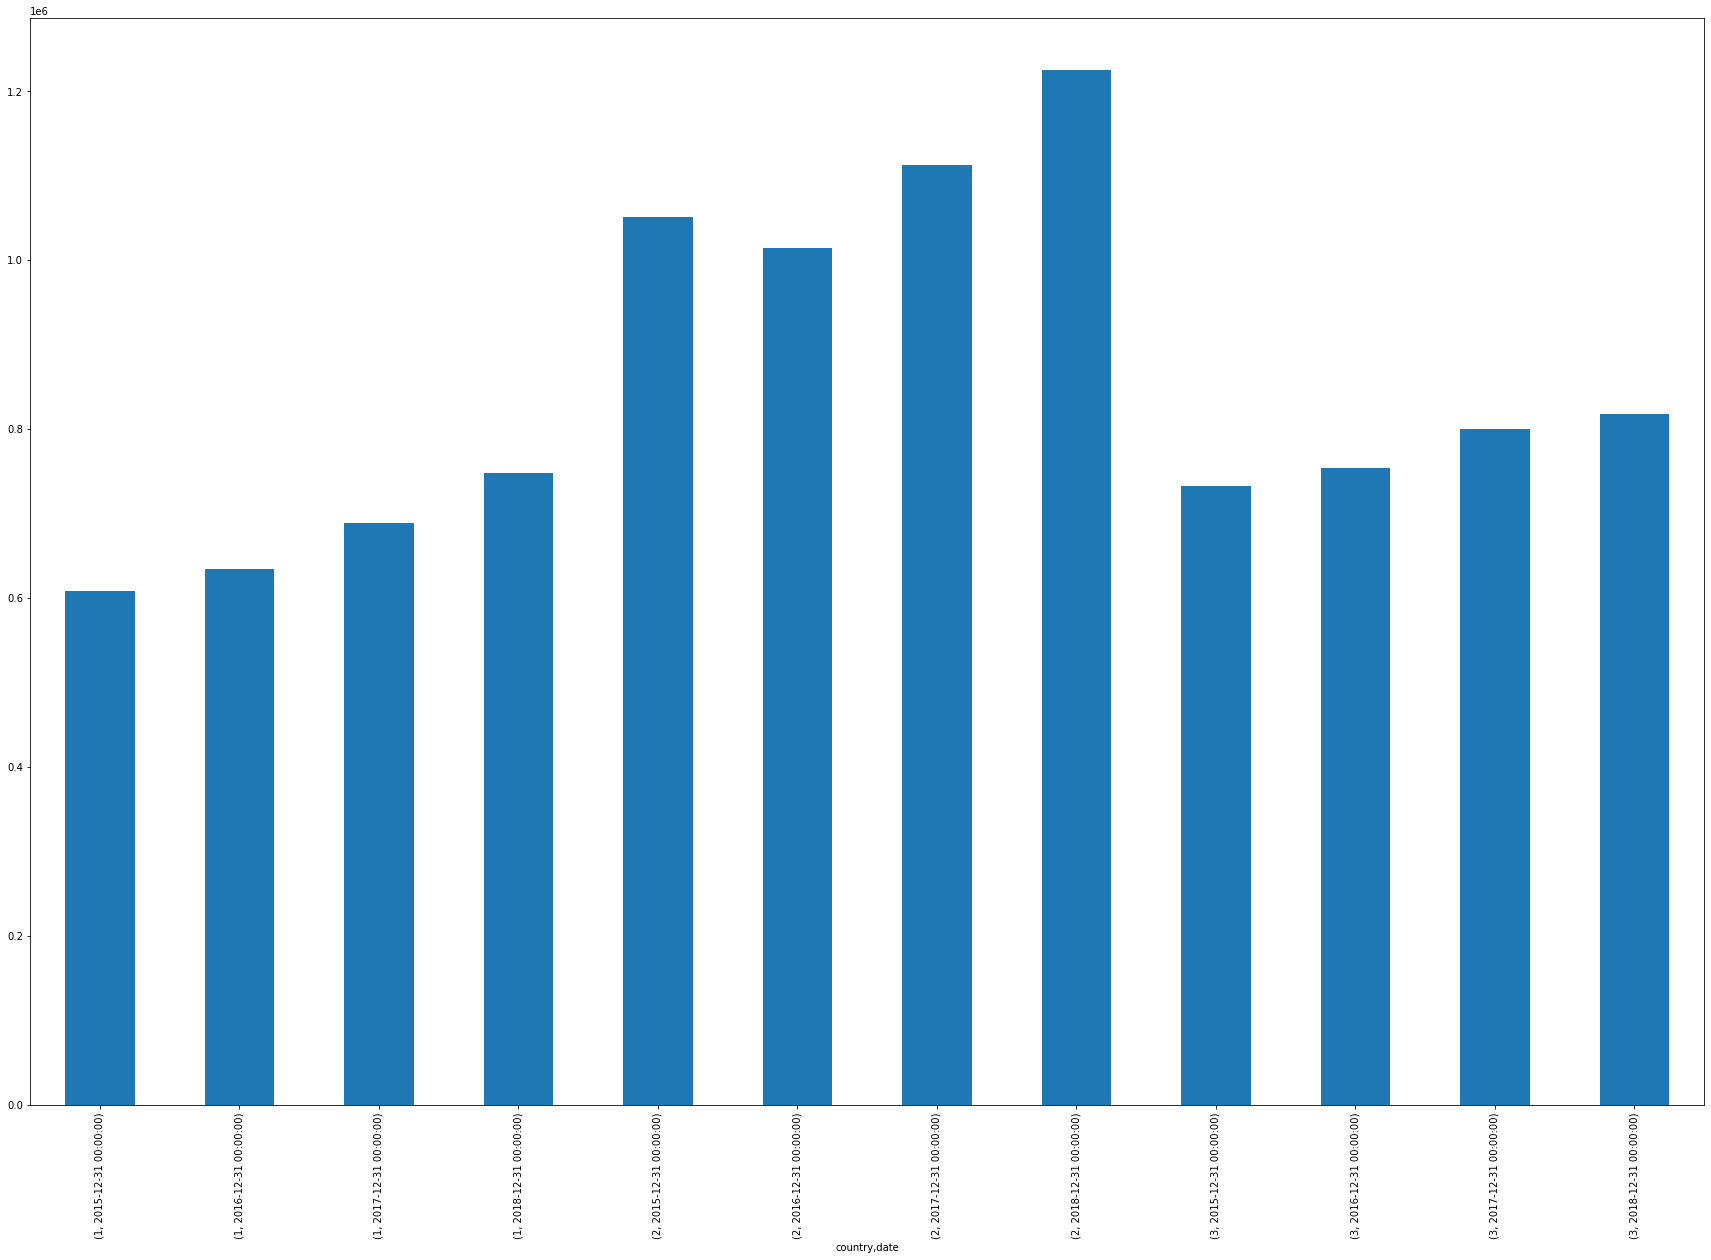

In [59]:
data_train['date'] = pd.to_datetime(data_train['date'], errors='coerce')
country = data_train.set_index('date')
df_country = country.groupby(['country', pd.Grouper(freq='y')]).num_sold.sum()
print(df_country)
df_country.plot(kind='bar', figsize=(30,20))

# 2. Store

### Number of sold per Store

store
KaggleMart    3715368
KaggleRama    6475990
Name: num_sold, dtype: int64


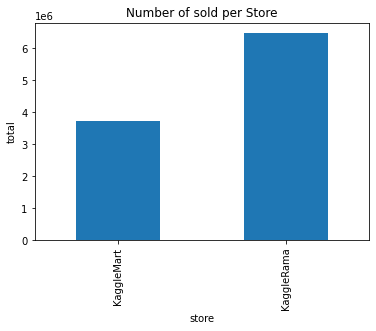

In [18]:
print(data_train.groupby('store').num_sold.sum())
data_train.groupby('store').num_sold.sum().plot(kind='bar')
plt.title('Number of sold per Store')
plt.xlabel('store')
plt.ylabel('total')
# plt.legend()
plt.show()

### Number of Sold per Store for each year 

store       date      
KaggleMart  2015-12-31     873168
            2016-12-31     875130
            2017-12-31     949098
            2018-12-31    1017972
KaggleRama  2015-12-31    1520823
            2016-12-31    1528222
            2017-12-31    1652699
            2018-12-31    1774246
Name: num_sold, dtype: int64


<AxesSubplot:xlabel='store,date'>

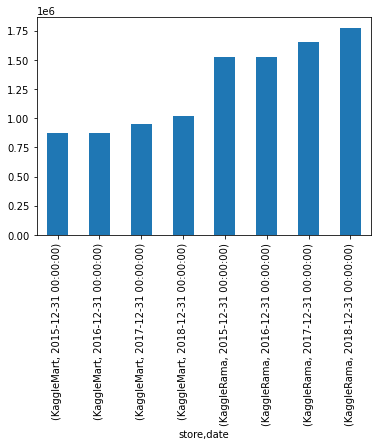

In [19]:
data_train['date'] = pd.to_datetime(data_train['date'], errors='coerce')
store = data_train.set_index('date')
df_store = store.groupby(['store', pd.Grouper(freq='y')]).num_sold.sum()
print(df_store)
df_store.plot(kind='bar')

# 3. Product

### Number of sold per Product

product
Kaggle Hat        5512465
Kaggle Mug        3106287
Kaggle Sticker    1572606
Name: num_sold, dtype: int64


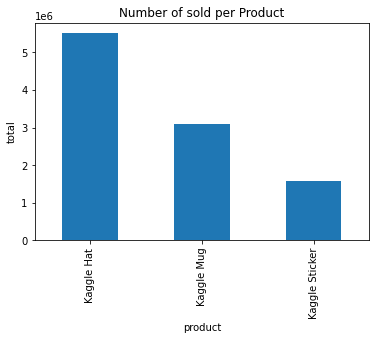

In [20]:
print(data_train.groupby('product').num_sold.sum())
data_train.groupby('product').num_sold.sum().plot(kind='bar')
plt.title('Number of sold per Product')
plt.xlabel('product')
plt.ylabel('total')
# plt.legend()
plt.show()

### Number of Sold per Product for each year 

product         date      
Kaggle Hat      2015-12-31    1296492
                2016-12-31    1300907
                2017-12-31    1405526
                2018-12-31    1509540
Kaggle Mug      2015-12-31     728634
                2016-12-31     731633
                2017-12-31     794396
                2018-12-31     851624
Kaggle Sticker  2015-12-31     368865
                2016-12-31     370812
                2017-12-31     401875
                2018-12-31     431054
Name: num_sold, dtype: int64


<AxesSubplot:xlabel='product,date'>

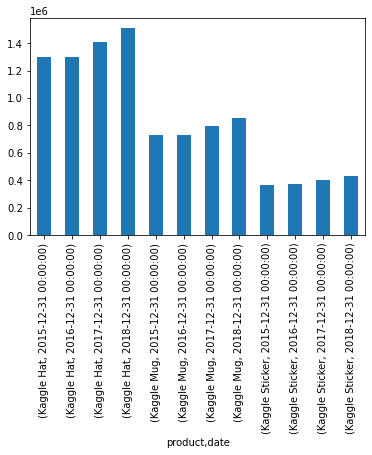

In [21]:
data_train['date'] = pd.to_datetime(data_train['date'], errors='coerce')
product = data_train.set_index('date')
df_product = product.groupby(['product', pd.Grouper(freq='y')]).num_sold.sum()
print(df_product)
df_product.plot(kind='bar')

## Change data to numerical

### 1.Country

In [22]:
print(data_train['country'].unique())

['Finland' 'Norway' 'Sweden']


In [23]:
data_train['country'].replace(['Finland', 'Norway', 'Sweden'], [1, 2, 3], inplace=True)
data_train

,row_id,date,country,store,product,num_sold
0,0,2015-01-01,1,KaggleMart,Kaggle Mug,329
1,1,2015-01-01,1,KaggleMart,Kaggle Hat,520
2,2,2015-01-01,1,KaggleMart,Kaggle Sticker,146
3,3,2015-01-01,1,KaggleRama,Kaggle Mug,572
4,4,2015-01-01,1,KaggleRama,Kaggle Hat,911
...,...,...,...,...,...,...
26293,26293,2018-12-31,3,KaggleMart,Kaggle Hat,823
26294,26294,2018-12-31,3,KaggleMart,Kaggle Sticker,250
26295,26295,2018-12-31,3,KaggleRama,Kaggle Mug,1004
26296,26296,2018-12-31,3,KaggleRama,Kaggle Hat,1441


## 2. Store

In [24]:
print(data_train['store'].unique())

['KaggleMart' 'KaggleRama']


In [25]:
data_train['store'].replace(['KaggleMart', 'KaggleRama'], [1, 2], inplace=True)
data_train

,row_id,date,country,store,product,num_sold
0,0,2015-01-01,1,1,Kaggle Mug,329
1,1,2015-01-01,1,1,Kaggle Hat,520
2,2,2015-01-01,1,1,Kaggle Sticker,146
3,3,2015-01-01,1,2,Kaggle Mug,572
4,4,2015-01-01,1,2,Kaggle Hat,911
...,...,...,...,...,...,...
26293,26293,2018-12-31,3,1,Kaggle Hat,823
26294,26294,2018-12-31,3,1,Kaggle Sticker,250
26295,26295,2018-12-31,3,2,Kaggle Mug,1004
26296,26296,2018-12-31,3,2,Kaggle Hat,1441


## 3. Product

In [26]:
print(data_train['product'].unique())

['Kaggle Mug' 'Kaggle Hat' 'Kaggle Sticker']


In [27]:
data_train['product'].replace(['Kaggle Mug', 'Kaggle Hat', 'Kaggle Sticker'], [1, 2, 3], inplace=True)
data_train

,row_id,date,country,store,product,num_sold
0,0,2015-01-01,1,1,1,329
1,1,2015-01-01,1,1,2,520
2,2,2015-01-01,1,1,3,146
3,3,2015-01-01,1,2,1,572
4,4,2015-01-01,1,2,2,911
...,...,...,...,...,...,...
26293,26293,2018-12-31,3,1,2,823
26294,26294,2018-12-31,3,1,3,250
26295,26295,2018-12-31,3,2,1,1004
26296,26296,2018-12-31,3,2,2,1441


# Linear Regression

In [28]:
X = data_train[['country', 'store', 'product']]
y = data_train['num_sold']

In [29]:
from sklearn import linear_model

In [30]:
regression = linear_model.LinearRegression()
regression.fit(X,y)

LinearRegression()

In [33]:
data_test = data_test['country'].replace(['Finland', 'Norway', 'Sweden'], [1, 2, 3], inplace=True)
data_test

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [35]:
data_test['store'].replace(['KaggleMart', 'KaggleRama'], [1, 2], inplace=True)
data_test['product'].replace(['Kaggle Mug', 'Kaggle Hat', 'Kaggle Sticker'], [1, 2, 3], inplace=True)

In [38]:
data_test

,row_id,date,country,store,product
0,26298,2019-01-01,1,1,1
1,26299,2019-01-01,1,1,2
2,26300,2019-01-01,1,1,3
3,26301,2019-01-01,1,2,1
4,26302,2019-01-01,1,2,2
...,...,...,...,...,...
6565,32863,2019-12-31,3,1,2
6566,32864,2019-12-31,3,1,3
6567,32865,2019-12-31,3,2,1
6568,32866,2019-12-31,3,2,2


In [41]:
# get_data = data_test[['country', 'store' 'product']]
get_data = data_test.iloc[:, 2:5]
get_data

# y_test = data_test['country','store', 'product']
# y_test

,country,store,product
0,1,1,1
1,1,1,2
2,1,1,3
3,1,2,1
4,1,2,2
...,...,...,...
6565,3,1,2
6566,3,1,3
6567,3,2,1
6568,3,2,2


In [43]:
prediction = regression.predict(get_data)
prediction

array([345.80806525, 258.32911248, 170.85015971, ..., 604.21699369,
       516.73804092, 429.25908814])

In [46]:
submission = pd.DataFrame({'row_id':data_test['row_id'], 'num_sold':prediction})
submission


,row_id,num_sold
0,26298,345.808065
1,26299,258.329112
2,26300,170.850160
3,26301,555.757263
4,26302,468.278310
...,...,...
6565,32863,306.788843
6566,32864,219.309890
6567,32865,604.216994
6568,32866,516.738041


In [47]:
submission.to_csv('submission.csv', index=False)

## Random Forest Regressor

In [48]:
from sklearn.ensemble import RandomForestRegressor

In [49]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 0) 
rf.fit(X,y)

RandomForestRegressor(random_state=0)

In [51]:
rf_pred = rf.predict(get_data)
rf_pred

array([204.32418951, 362.73653081, 103.07885788, ..., 410.67112278,
       731.65570741, 208.28455426])

In [57]:
rf_submission = pd.DataFrame({'row_id':data_test['row_id'], 'num_sold':prediction})
rf_submission

,row_id,num_sold
0,26298,345.808065
1,26299,258.329112
2,26300,170.850160
3,26301,555.757263
4,26302,468.278310
...,...,...
6565,32863,306.788843
6566,32864,219.309890
6567,32865,604.216994
6568,32866,516.738041


In [58]:
rf_submission.to_csv('rf_submission.csv', index=False)